### Objective:
This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

##   Data Pre-Processing

In [1]:
# 1. Load your dataset. 

### Import library 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram




### Import dataset

In [3]:
credit_df = pd.read_csv("C:/Users/DELL/Desktop/GOMYCODE/checkpoints/checkpoint8_K-Means_& _Hierarchical_Clustering/CC GENERAL.csv")
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
credit_df.shape

(8950, 18)

In [6]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### we can Notive that:
 * there are many outliers , but we can't drop them because they may contain important information, so we treat the outliers as extreme values.

### Checking Null Values

In [7]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### we can Notice that:
* CREDIT_LIMIT and MINIMUM_PAYMENT content some null values. We will handling the missing values by replace it by means.

In [8]:
credit_df['CREDIT_LIMIT'].fillna(credit_df['CREDIT_LIMIT'].mean(), inplace=True)
credit_df['MINIMUM_PAYMENTS'].fillna(credit_df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [9]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Now there is no Null values

In [11]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### we can Notice that:
* CUST_ID has data types object, so we can drop it.

In [12]:
credit_df.drop('CUST_ID', axis=1, inplace=True)
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


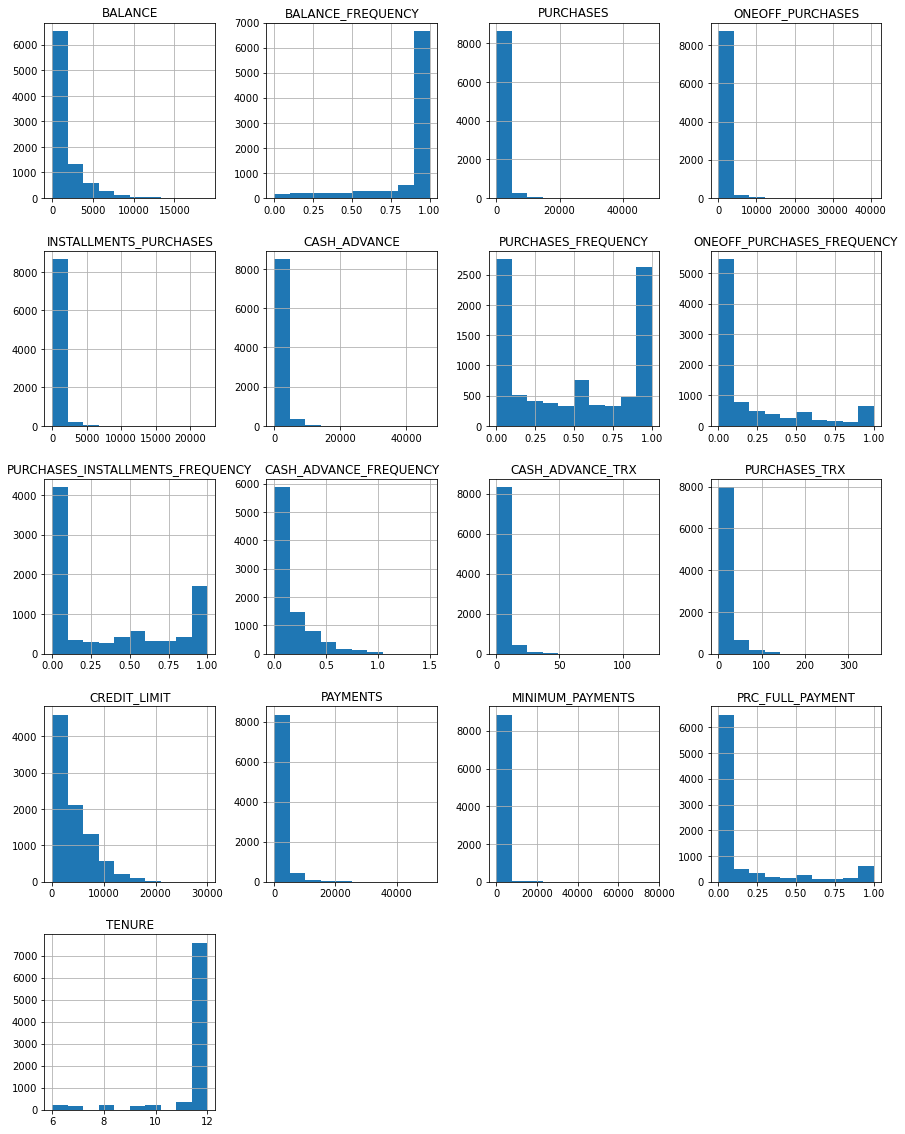

In [13]:
credit_df.hist(figsize = (15,20));

### Data Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [14]:
scaler = StandardScaler() 
scaled_credict_df = scaler.fit_transform(credit_df)

In [15]:
# Normalizing the Data 
normalized_credit_df = normalize(scaled_credict_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_credit_df = pd.DataFrame(normalized_credit_df)

### Dimension Reduction using PCA

PCA transforms a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables of data.

In [16]:
# we applied  (PCA) to transform data into 2 dimensions for visualization
# because we won’t be able to visualize the data in 17 dimensions.

In [17]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_credit_df)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.489826,-0.679677
1,-0.518791,0.545017
2,0.330885,0.268978
3,-0.482374,-0.092111
4,-0.563289,-0.481914


## Clustering

In [18]:
# 2. Use hierarchical clustering to identify the inherent groupings within your data.

In [19]:
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
clust_labels = model .fit_predict(X_principal)

In [20]:
# we can print each point’s corresponding cluster.
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,2
2,1
3,0
4,0
5,1
6,3
7,1
8,0
9,0


In [21]:
# 3. Plot the clusters. 

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_credit_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf.head(2)

,principal component 1,principal component 2
0,-0.489826,-0.679679
1,-0.518791,0.545009


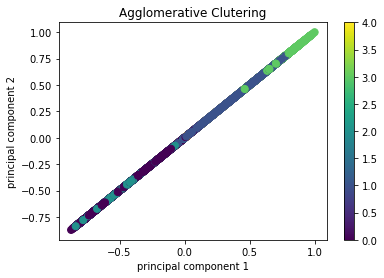

In [48]:
fig =plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter (principalDf['principal component 1'] , principalDf['principal component 1'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.colorbar(scatter)

In [24]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':clust_labels})], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster
0,-0.489826,-0.679679,0
1,-0.518791,0.545009,2
2,0.330885,0.268979,1
3,-0.482374,-0.092112,0
4,-0.563289,-0.481915,0


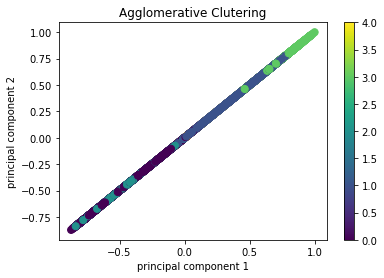

In [25]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (finalDf['principal component 1'] , finalDf['principal component 1'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.colorbar(scatter)

### KMeans

In [26]:
# 4. Plot the dendrogram. Use k-means clustering. 

###  Dendrogram

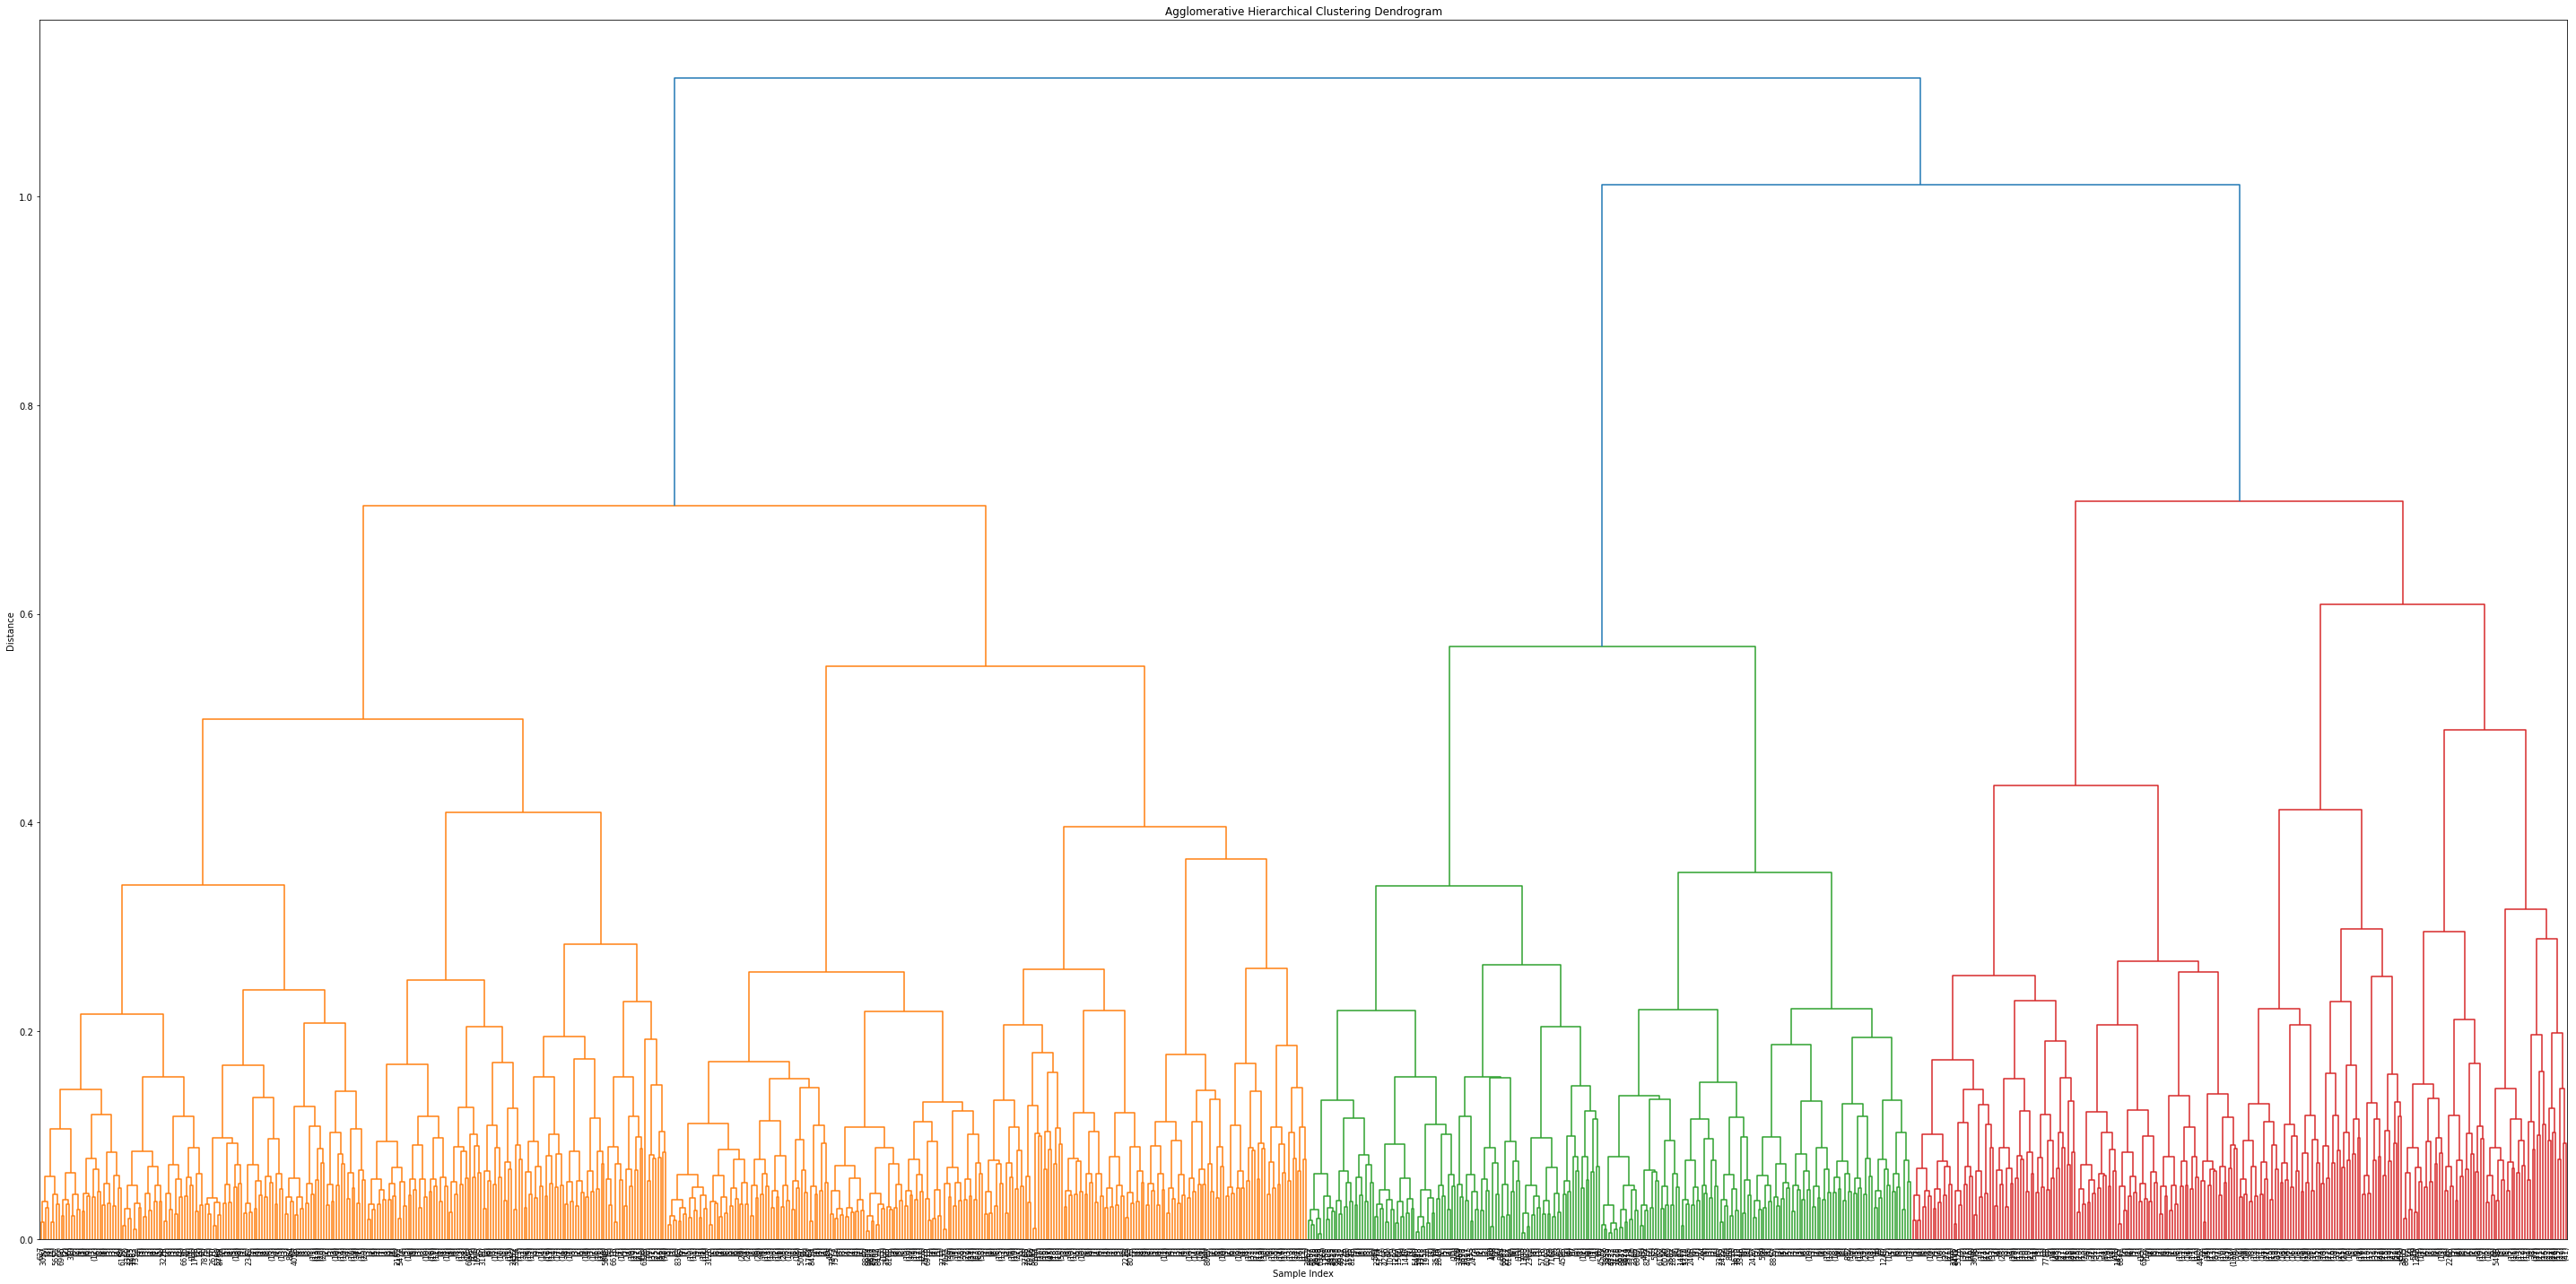

In [27]:
# Plotting Dendrogram

Z= linkage(X_principal, method = 'average', metric = 'euclidean')
plt.figure(figsize=(40,20))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode='level', p =9)
plt.tight_layout()
plt.show()

### Choosing the K

In [28]:
# 5. Try different k values and select the best one. 

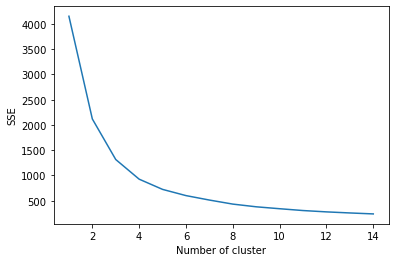

In [29]:
# we must first specify the number of clusters K. Here I used the elbow method to specify the best K
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### we can Notice that:
* it was hard to find the elbow point of the curve, so decided to use silhouette score.

Text(0, 0.5, 'Silhouette Score')

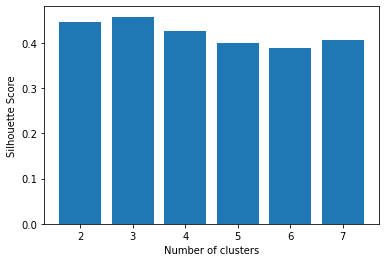

In [30]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results for different k values 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 

#### we can Notice that:
* the highest silhouette score is in k = 3. It means the best number of clusters, in this case, is 3.

In [31]:
kmean= KMeans(3)
kmean.fit(scaled_credict_df)
labels=kmean.labels_

In [32]:
credit_clusters=pd.concat([credit_df, pd.DataFrame({'cluster':labels})], axis=1)
credit_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### Interpret Clusters

In [33]:
# After getting the clusters, I interpreted them in the visualization using FacetGrid.

NumExpr defaulting to 8 threads.


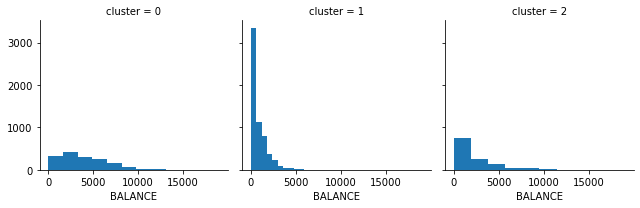

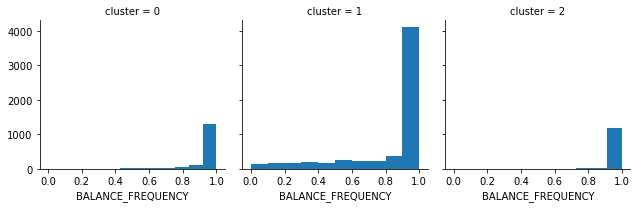

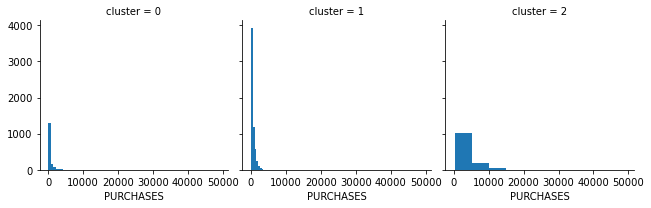

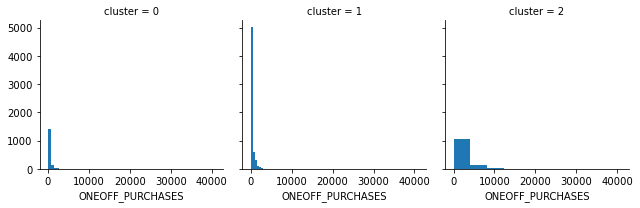

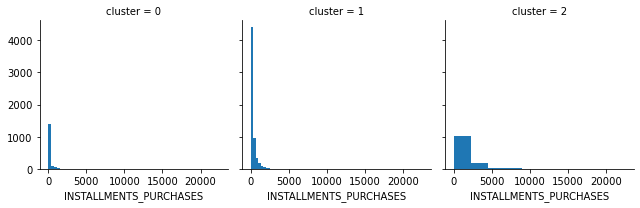

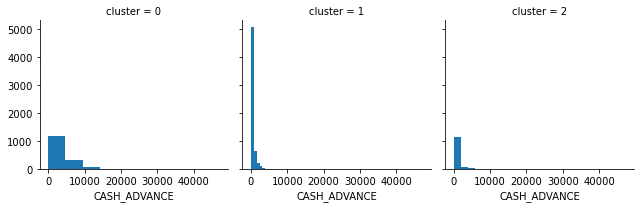

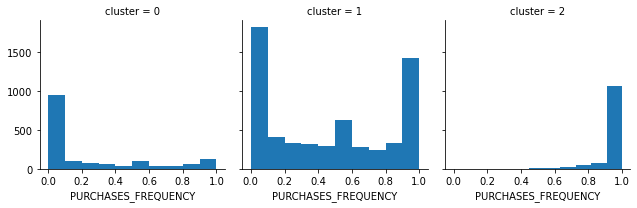

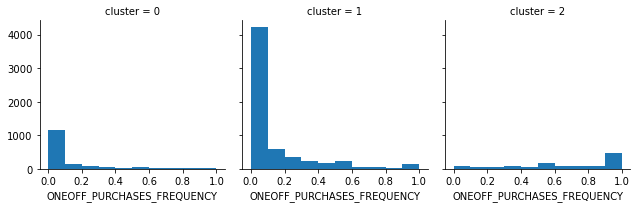

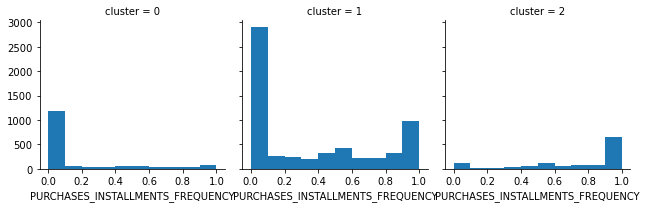

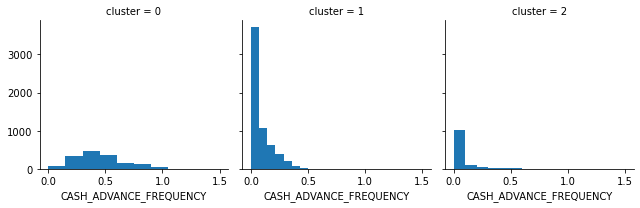

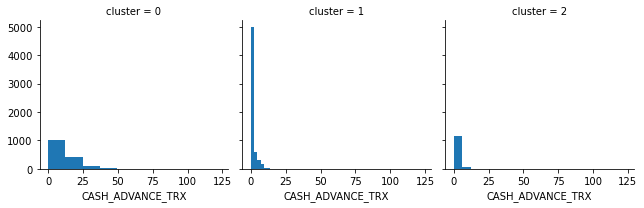

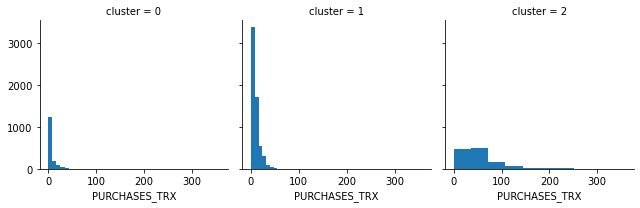

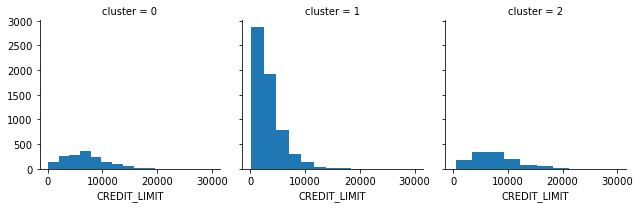

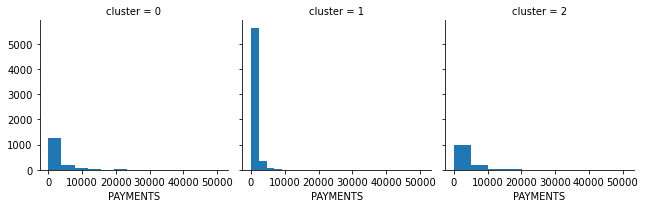

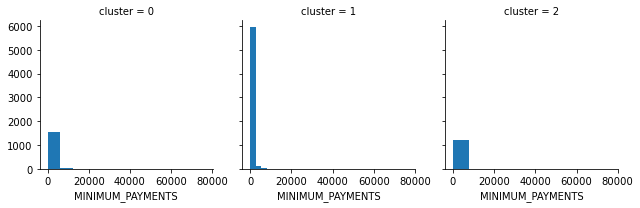

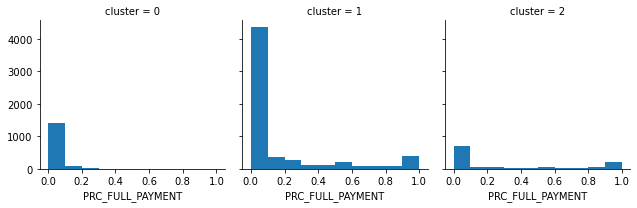

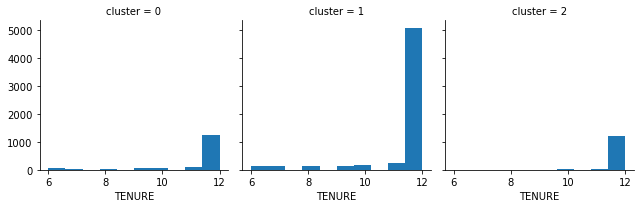

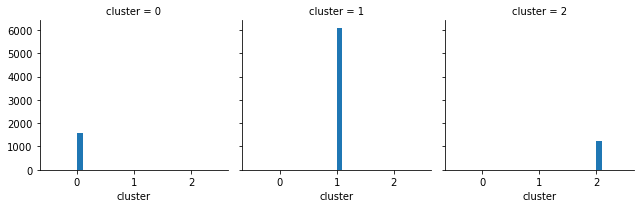

In [34]:
for c in credit_clusters:

    grid= sns.FacetGrid(credit_clusters, col='cluster')
    grid.map(plt.hist, c)

In [35]:
credit_clusters['cluster'].value_counts()

1    6102
0    1593
2    1255
Name: cluster, dtype: int64

In [36]:
credit_clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3994.082644,0.958110,385.502354,249.198581,136.381406,3873.068601,0.233303,0.111151,0.145142,0.447722,12.405524,5.639046,6689.958911,3020.185098,1791.793213,0.033838,11.351538
1,800.080109,0.834733,501.206106,249.540354,251.987443,331.111812,0.463298,0.130370,0.344700,0.068419,1.213700,8.572927,3264.957069,908.211721,550.309990,0.154850,11.478368
2,2197.121297,0.981483,4228.062430,2695.335371,1533.205147,454.704300,0.948160,0.668854,0.738761,0.062812,1.521116,56.062151,7685.617530,4110.418079,1213.012276,0.300358,11.917131


### Clusters Interpretation
#### Cluster 0:
* Balance : low Balance
* Frequency : high (updated frequently)
* Purchase : low Purchase
* Frequency : low
* Cash Advance : low
* Minimum Payment : low 
* Credit Limit : low

--> This customer group indicates a small group of customers who have low balances, small spenders (low purchase) with the lowest credit limit.

#### Cluster 1:
* Balance : medium Balance
* Frequency : high (updated frequently)
* Purchase : high Purchase 
* Frequency : high (updated frequently) 
* Cash Advance : low
* Minimum Payment : high 
* Credit Limit : high

-->  This customer group indicates a large group of customers who have medium balances, spenders (high purchase) with the highest credit limit.

#### Cluster 2:
* Balance : high Balance
* Frequency : high (updated frequently)
* Purchase : low Purchase
* Frequency : very low (does not updated frequently)
* Cash Advance : high
* Minimum Payment : high
* Credit Limit : high

--> This customer group indicates a small group of customers who have high balances and cash advances, low purchase frequency with high credit limit. We can assume that this customer segment uses their credit cards as a loan.




In [37]:
# 6. Plot the clusters. 

In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_credit_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf.head(2)

,principal component 1,principal component 2
0,-0.489826,-0.679678
1,-0.518792,0.545011


In [39]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster
0,-0.489826,-0.679678,1
1,-0.518792,0.545011,0
2,0.330887,0.268976,1
3,-0.482376,-0.092108,1
4,-0.563289,-0.481915,1


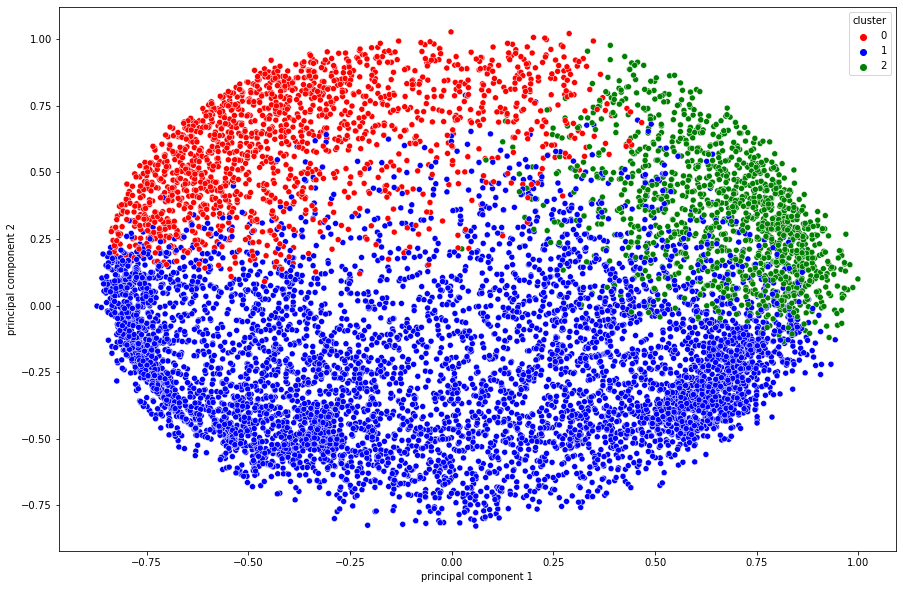

In [40]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green'])
plt.show()

In [41]:
# 7. Compare the two results. 